# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

In [84]:
# Step 1: Load and Standardize the data (use of numpy only allowed)

import numpy as np
import pandas  as pd

df = pd.read_csv('fuel_econ.csv')
df = pd.get_dummies(df) 
df_numeric = df.select_dtypes(include=[np.number])

standardized_data = (df_numeric - np.mean(df_numeric, axis=0)) / np.std(df_numeric, axis=0) #data standardization 
standardized_data[:5]  

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,-1.737140,-1.475835,0.283102,0.650536,1.467096,-1.217378,-0.859960,-0.852430,-1.290630,-1.392475,-1.008323,1.022838,-0.950580,-0.945755
1,-1.736684,-1.475835,-0.781816,-0.727998,1.864762,-1.217378,0.006427,-0.117434,0.184947,-0.039200,0.071864,-0.298550,0.188608,0.194258
2,-1.736227,-1.475835,0.283102,0.497365,1.864762,-1.217378,-0.694416,-0.753245,-0.592020,-0.851750,-0.686339,0.567934,-0.380986,-0.375749
3,-1.735770,-1.475835,0.283102,0.497365,1.864762,-1.217378,-0.782800,-0.830286,-0.827384,-1.027588,-0.818651,0.752062,-0.380986,-0.375749
4,-1.735313,-1.475835,-0.781816,-0.421657,-0.627278,0.734890,0.471083,0.433147,0.967516,0.992531,0.648059,-0.720961,1.327796,1.334271


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [94]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data.T)
cov_matrix

array([[ 1.00025458,  0.98591866, -0.06011148, -0.07468488, -0.00657025,
        -0.02195656,  0.09182316,  0.09124849,  0.0906161 ,  0.09538375,
         0.09382686, -0.09974229, -0.1279056 , -0.12235207],
       [ 0.98591866,  1.00025458, -0.05532701, -0.07044161,  0.00623397,
        -0.03365174,  0.06806739,  0.06675938,  0.07330836,  0.07766039,
         0.07201181, -0.0811853 , -0.1498676 , -0.14517775],
       [-0.06011148, -0.05532701,  1.00025458,  0.93411019,  0.24763384,
        -0.00426546, -0.69327904, -0.66619842, -0.76646982, -0.77169964,
        -0.73821112,  0.84848979, -0.78405759, -0.78201448],
       [-0.07468488, -0.07044161,  0.93411019,  1.00025458,  0.2594021 ,
         0.02207729, -0.71366074, -0.6863403 , -0.78418374, -0.78865771,
        -0.75859024,  0.85559254, -0.7936343 , -0.79141752],
       [-0.00657025,  0.00623397,  0.24763384,  0.2594021 ,  1.00025458,
        -0.66581137, -0.27817962, -0.27261515, -0.29688365, -0.29858023,
        -0.29095711,  0.28

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [86]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors =  np.linalg.eig(cov_matrix)
eigenvalues_sorted = eigenvalues[sorted_indices]  #sorting eigenvalues in descending order
eigenvalues, eigenvectors

(array([8.95720924e+00, 2.06777956e+00, 1.59364217e+00, 6.70587666e-01,
        3.01684118e-01, 1.61017548e-01, 1.25550471e-01, 6.40205207e-02,
        3.23528963e-02, 1.36962433e-02, 9.24627112e-03, 4.24637785e-03,
        2.14358185e-03, 3.87485886e-04]),
 array([[ 1.89952516e-02, -6.87675276e-01,  7.65365183e-02,
          1.83729680e-02, -1.42115022e-02,  7.02789695e-02,
          1.14861126e-01,  4.01097554e-03, -1.15143583e-01,
         -6.95538857e-01, -6.83326435e-02,  2.10633586e-02,
         -7.10578367e-03,  6.07618642e-04],
        [ 1.24694065e-02, -6.89503292e-01,  6.88439505e-02,
         -9.43831862e-03, -1.35600088e-02,  3.37955333e-02,
          8.53170135e-02, -7.51768613e-03, -5.48830131e-02,
          7.10425085e-01,  5.58369479e-02, -9.48384475e-03,
         -3.26885432e-04, -3.98397374e-03],
        [-2.81632694e-01,  1.98550575e-02,  5.61398643e-02,
          6.00933196e-01,  9.71151716e-02, -7.09369930e-02,
          2.53817629e-01, -6.79764243e-01,  1.19688616

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

In [87]:
# Step 5: Sort Principal Components
sorted_indices = sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvectors

array([[ 1.89952516e-02, -6.87675276e-01,  7.65365183e-02,
         1.83729680e-02, -1.42115022e-02,  7.02789695e-02,
         1.14861126e-01,  4.01097554e-03, -1.15143583e-01,
        -6.95538857e-01, -6.83326435e-02,  2.10633586e-02,
        -7.10578367e-03,  6.07618642e-04],
       [ 1.24694065e-02, -6.89503292e-01,  6.88439505e-02,
        -9.43831862e-03, -1.35600088e-02,  3.37955333e-02,
         8.53170135e-02, -7.51768613e-03, -5.48830131e-02,
         7.10425085e-01,  5.58369479e-02, -9.48384475e-03,
        -3.26885432e-04, -3.98397374e-03],
       [-2.81632694e-01,  1.98550575e-02,  5.61398643e-02,
         6.00933196e-01,  9.71151716e-02, -7.09369930e-02,
         2.53817629e-01, -6.79764243e-01,  1.19688616e-01,
         2.20121563e-03,  1.99493288e-02,  1.60174402e-02,
         8.04028190e-03, -8.90395340e-04],
       [-2.86142593e-01,  3.10582044e-02,  6.39803619e-02,
         5.69008152e-01, -1.12579685e-02,  5.20085469e-04,
         2.41804525e-01,  7.26076226e-01,  5.

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [88]:
# Step 6: Project Data onto Principal Components
num_components = 2 # 
reduced_data = standardized_data.dot(sorted_eigenvectors[:, :num_components]) 
reduced_data[:5]

,0,1
0,-3.191462,1.987694
1,0.387527,1.991946
2,-2.091485,2.037434
3,-2.379141,2.063802
4,2.597268,2.504202


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [89]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (3929, 2)


,0,1
0,-3.191462,1.987694
1,0.387527,1.991946
2,-2.091485,2.037434
3,-2.379141,2.063802
4,2.597268,2.504202


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

<class 'pandas.core.frame.DataFrame'>


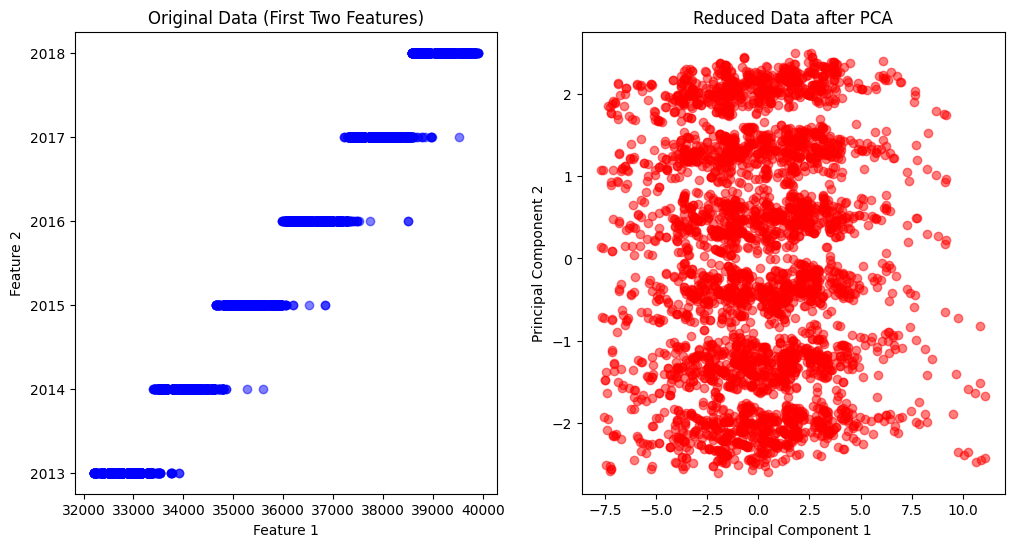

In [90]:
import matplotlib.pyplot as plt

print(type(reduced_data))

# Plot original data (first two features for simplicity)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_numeric.iloc[:, 0], df_numeric.iloc[:, 1], color='blue', alpha=0.5)
plt.title('Original Data (First Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot reduced data after PCA
plt.subplot(1, 2, 2)
plt.scatter(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], color='red', alpha=0.5)
plt.title('Reduced Data after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

Explained Variance by Each Principal Component: [6.39637819e-01 1.47660948e-01 1.13802612e-01 4.78869279e-02
 2.15433810e-02 1.14983262e-02 8.96560831e-03 4.57173046e-03
 2.31033299e-03 9.78054100e-04 6.60279841e-04 3.03235505e-04
 1.53074019e-04 2.76705189e-05]


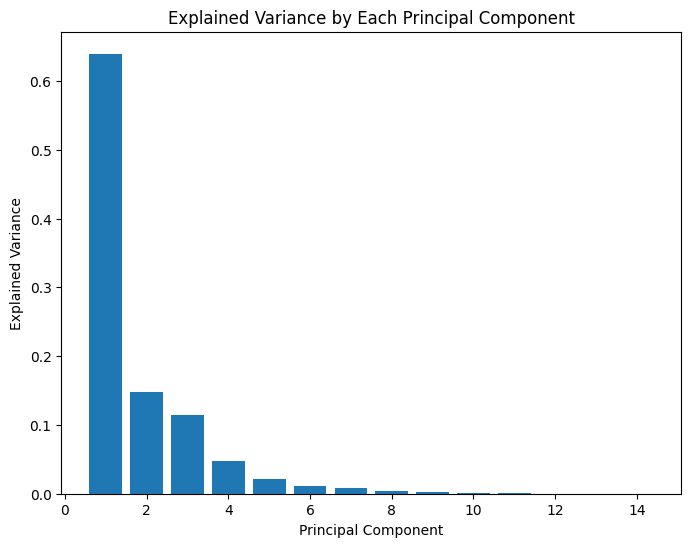

In [91]:
total_variance = sum(eigenvalues)

explained_variance = eigenvalues / total_variance

print("Explained Variance by Each Principal Component:", explained_variance)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.title("Explained Variance by Each Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.show()


In [92]:
#TASK 2- selecting the number of principal Components based on the variance

explained_variance = eigenvalues_sorted / np.sum(eigenvalues_sorted)
cumulative_explained_variance = np.cumsum(explained_variance)

threshold = 0.95

num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

selected_eigenvectors = sorted_eigenvectors[:, :num_components]
projected_data_selected = standardized_data.dot(selected_eigenvectors)

print(f"Number of components selected: {num_components}")
print(f"Cumulative explained variance: {cumulative_explained_variance[:num_components]}")


Number of components selected: 5
Cumulative explained variance: [0.63963782 0.78729877 0.90110138 0.94898831 0.97053169]


In [93]:
#TASK 3- OPTIMIZE FOR LARGE DATASETS 

U, S, VT = np.linalg.svd(standardized_data, full_matrices=False)

explained_variance = (S**2) / np.sum(S**2)

cumulative_explained_variance = np.cumsum(explained_variance)

threshold = 0.95
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f"Number of components selected: {num_components}")
print(f"Cumulative explained variance: {cumulative_explained_variance[:num_components]}")


Number of components selected: 5
Cumulative explained variance: [0.63963782 0.78729877 0.90110138 0.94898831 0.97053169]
